In [1]:
import pandas as pd

# Guide on how to use `Data` module 

### 1. Firstly, import the `Data` module using syntax as below

In [2]:
from Data import Data

Remark : Realise that the name of the class used to store and visualise the data from our selected areas and the module are the same which is ```Data```.

### 2. Create instance of an object containing the attributes of class ```Data```.

Class ```Data``` takes six arguments to be classified as the attributes of the objects, for example:

                       Data(self,dataframe,gas_species,site_code,units,scale)
                  
- dataframe = file containing the data to store, eg. ```pd.DataFrame```

- gas_species = string, name of the gas for classification, eg. ```"carbon dioxide"```

- site_code = string, code of location/area, eg. ```"BS1 4HJ"```

- units = string, eg. ```"ppb"```/```"ppm"```

- scale = string, name of the lab where the primary gas standard was created, eg. ```"NOAA"```/```"SIO"```

In [3]:
mhd_ch4 = Data(dataframe=pd.read_csv("mhd_ch4.csv"),gas_species="Methane",site_code="Mace Head",units="ppb",scale="SIO")

### 3. Calculating average value over time for instance of class ```Data```.

Instance of class ```Data``` can use method calc_average that takes two argument including its own, for example:

                                       average = self.average(period="M")
                         
- period = increment of time for data to be averaged upon, ```"M"``` as default, also accept ```"H"```, ```"D"```, ```"Y"```

In [4]:
mhd_ch4.calc_average(period="D")

Remark : Realise there is no return value for this method since the value is stored as an attribute ```self.average``` to the instance of class ```Data```. So, to obtain the average value after computation use the syntax as below.

In [5]:
mhd_ch4.average

,mf
time,
2019-01-01,1929.655930
2019-01-02,1986.628246
2019-01-03,1979.941342
2019-01-04,1972.954192
2019-01-05,1975.799358
...,...
2019-12-27,1942.196393
2019-12-28,1949.714527
2019-12-29,1951.297047


Remark : the average value will always be stored in ppb unit.

### 4. Graphical comparison of two instances of class ```Data```.

Class ```Data``` has ```plot``` method that helps visualise the average data across time between two instances, for example:

                            Data.plot(self,other,start,finish,term="M",size=100,quantile=0.10)

- self = instance of class ```Data```

- other = instance of class ```Data```

- start = datetime, eg. ```"2019-03-01"```

- finish = datetime, eg. ```"2019-07-01"```

- period = string, period to average the value of data, eg. ```"D"```, ```"H"```

- size = float, size of the window for baseline to be calculated

- quantile = float, low value of quantile to consider for the baseline value

In [6]:
tac_ch4 = Data(dataframe=pd.read_csv("tac_ch4.csv"),gas_species="Methane",site_code="Tacolneston",units="ppb",scale="SIO")
tac_ch4.calc_average(period="D")

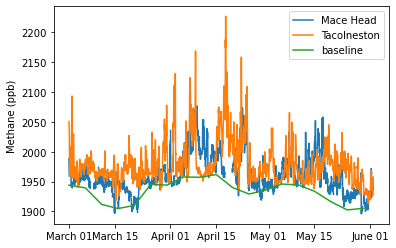

In [7]:
Data.plot(mhd_ch4,tac_ch4,"2019-03-01","2019-06-01","H",120,0.05)

### 5. Generating approximate polynomial for instances of class ```Data```.

Class ```Data``` has ```polynomial``` method that helps visualise the polynomial that best fits one or two instances, for example:

                         polynomial(self,other,start='2019-01-01',finish="2019-12-31",period="M",degree=3)

- self = instance of class ```Data```

- other = instance of class ```Data```

- start = datetime, eg. ```"2019-03-01"```

- finish = datetime, eg. ```"2019-07-01"```

- period = string, period to average the value of data, eg. ```"D"```, ```"H"```

- degree = integer, the degree for the polynomial function

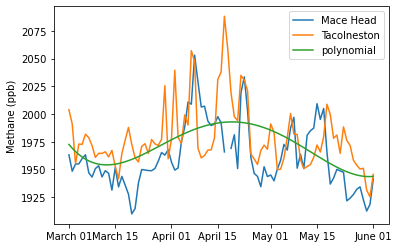

In [8]:
Data.polynomial(mhd_ch4,tac_ch4,"2019-03-01","2019-06-01","D",4)

Remark : the ```polynomial``` method will approximate values for missing or ```NaN``` values. This is to help obtain the smoothest line for polynomial function to be generated.

```polynomial``` method also allows user to generate polynomial for one instance of class ```Data```. To do so, instead of inserting different instance for the second argument in the ```polynomial``` method, just insert the same instance as ```self```. For example, 

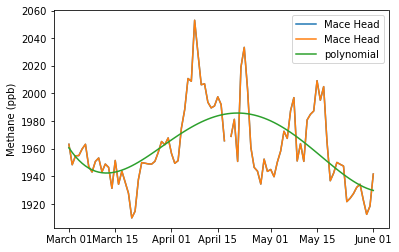

In [9]:
Data.polynomial(mhd_ch4,mhd_ch4,"2019-03-01","2019-06-01","D",4)

### Unit conversion for visualisation of data

As we can see both the visualisation method in ```Data``` class are set to be measured in unit of pbb. In which, we expected for the graph to be adapted with other units like ppm (1 ppm = 1000 ppb). To do so, user should be aware of setting the attribute ```units``` when initialising instance for class ```Data```. By doing so, the method ```calc_average``` can distinguish the actual unit of the data provided and able to store the average values with the correct unit. For example,

In [10]:
tac_co2 = Data(dataframe=pd.read_csv("tac_co2.csv"),gas_species="Carbon Dioxide",site_code="Tacolneston",units="ppm",scale="NOAA")
mhd_co2 = Data(dataframe=pd.read_csv("mhd_co2.csv"),gas_species="Carbon Dioxide",site_code="Mace Head",units="ppm",scale="NOAA")

Remark : realise how the attributes of the units are changed to ```"ppm"```.

In [11]:
tac_co2.calc_average("D")
tac_co2.average

,mf
time,
2019-01-01,414872.936250
2019-01-02,413129.128333
2019-01-03,415617.485000
2019-01-04,424432.986667
2019-01-05,421207.480000
...,...
2019-12-27,428378.194583
2019-12-28,427655.197917
2019-12-29,427862.921667


Remark : the average value will always be stored in ppb unit.

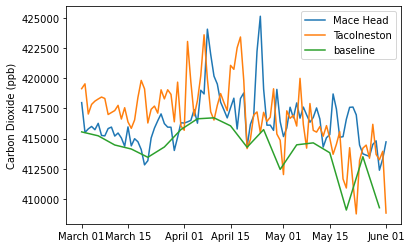

In [12]:
Data.plot(mhd_co2,tac_co2,"2019-03-01","2019-06-01","D",5,0.05)

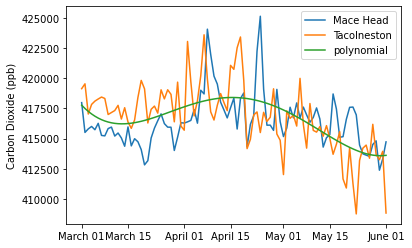

In [13]:
Data.polynomial(mhd_co2,tac_co2,"2019-03-01","2019-06-01","D",4)

#### Other examples:

In [14]:
tac_n2o = Data(dataframe=pd.read_csv("tac_n2o.csv"),gas_species="Nitrogen Dioxide",site_code="Tacolneston",units="ppb",scale="SIO")
mhd_n2o = Data(dataframe=pd.read_csv("mhd_n2o.csv"),gas_species="Nitrogen Dioxide",site_code="Mace Head",units="ppb",scale="SIO")

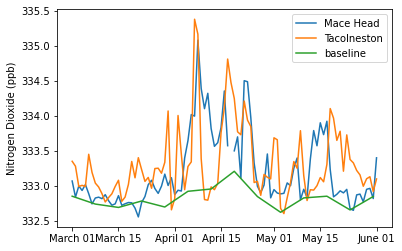

In [15]:
Data.plot(mhd_n2o,tac_n2o,"2019-03-01","2019-06-01","D",7,0.05)

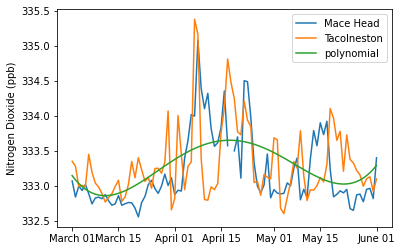

In [16]:
Data.polynomial(mhd_n2o,tac_n2o,"2019-03-01","2019-06-01","D",4)